# Crime and Weather-ment

Will an increase in certain weather conditions be statistically related to increases in crime?

In [113]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as stats



crime_2019=pd.read_csv("data/Crime_Data_2019.csv") #2019- 2021
louisville_weather=pd.read_csv("data/2451549.csv") #Weather from 1-1-1997 til 2-9-2021

# print(crime_2019.describe())

num_crime_reports = len(crime_2019)
print("The number of crime reports: ", num_crime_reports)

list_of_crime_types = crime_2019.CRIME_TYPE.unique()


total_counts = crime_2019['CRIME_TYPE'].value_counts()

# crime_2019


The number of crime reports:  148863


In [85]:
total_counts

ASSAULT                     31201
THEFT/LARCENY               26797
OTHER                       17429
DRUGS/ALCOHOL VIOLATIONS    14249
VEHICLE BREAK-IN/THEFT      13865
VANDALISM                   12096
BURGLARY                     9821
MOTOR VEHICLE THEFT          9136
FRAUD                        7413
ROBBERY                      2409
WEAPONS                      2092
SEX CRIMES                    999
DISTURBING THE PEACE          863
HOMICIDE                      288
ARSON                         198
DUI                             7
Name: CRIME_TYPE, dtype: int64

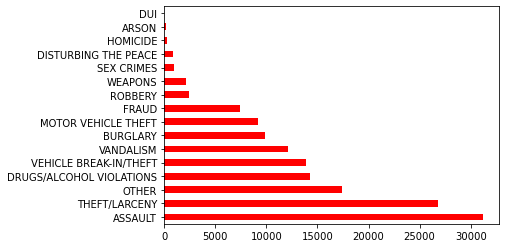

In [77]:
total_counts.plot.barh(x='Number of crimes', color='red' )

In [86]:
crime_2019['DATE_OCCURED_NOTIME'] = crime_2019['DATE_OCCURED'].str.split(' ').str[0]
crime_2019['DATE_OCCURED_NOTIME']

0         2019-02-08
1         2019-02-14
2         2019-02-01
3         2019-02-09
4         2019-02-15
             ...    
148858    2020-12-29
148859    2020-09-24
148860    2020-12-30
148861    2020-12-30
148862    2020-12-30
Name: DATE_OCCURED_NOTIME, Length: 148863, dtype: object

In [87]:
louisville_weather['PRCP'].describe()   #describe precipitation column
louisville_weather['DATE']


0       1997-01-01
1       1997-01-02
2       1997-01-03
3       1997-01-04
4       1997-01-05
           ...    
8801    2021-02-05
8802    2021-02-06
8803    2021-02-07
8804    2021-02-08
8805    2021-02-09
Name: DATE, Length: 8806, dtype: object

In [88]:
date_crime_count_df = louisville_weather[['DATE','PRCP']].iloc[8035:8400]
date_crime_count_df

,DATE,PRCP
8035,2019-01-01,0.00
8036,2019-01-02,0.00
8037,2019-01-03,0.00
8038,2019-01-04,0.69
8039,2019-01-05,0.01
...,...,...
8395,2019-12-27,0.00
8396,2019-12-28,0.01
8397,2019-12-29,1.77
8398,2019-12-30,0.13


In [94]:
#get crime count per date
crime_series=[]
for entry in date_crime_count_df['DATE']:
    number_of_crimes_per_day = 0
    for item in crime_2019['DATE_OCCURED_NOTIME']:
        if entry == item:
            number_of_crimes_per_day += 1
    crime_series.append(number_of_crimes_per_day)

In [98]:
date_crime_count_df['NUMBER_OF_CRIMES'] = crime_series

In [97]:
date_crime_count_df

,DATE,PRCP,NUMBER_OF_CRIMES
8035,2019-01-01,0.00,311
8036,2019-01-02,0.00,204
8037,2019-01-03,0.00,206
8038,2019-01-04,0.69,188
8039,2019-01-05,0.01,222
...,...,...,...
8395,2019-12-27,0.00,164
8396,2019-12-28,0.01,155
8397,2019-12-29,1.77,134
8398,2019-12-30,0.13,234


In [101]:
#What is the correlation between precipiation amounts and number of crimes per day
stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['NUMBER_OF_CRIMES'])

(-0.15489919898352095, 0.003006009773763343)

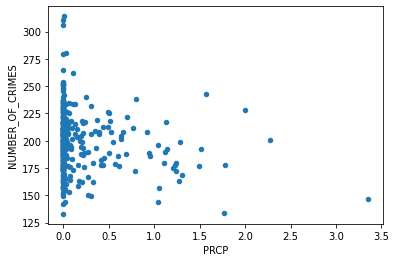

In [112]:
date_crime_count_df.plot(x='PRCP', y='NUMBER_OF_CRIMES', kind='scatter', )